# 확률론적 언어 모형( Probabilistic Language Model )

## NLTK의 N-gram 기능

In [1]:
from nltk import bigrams, word_tokenize
from nltk.util import ngrams

In [2]:
sentence = "I am a boy."
tokens = word_tokenize( sentence )
print( tokens )

['I', 'am', 'a', 'boy', '.']


In [3]:
bigram = bigrams( tokens )
trigram = ngrams( tokens, 3 )

print( "\nbigram:" )
for t in bigram:
    print( t )

print( "\ntrigram:" )
for t in trigram:
    print( t )


bigram:
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram:
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


#### 조건부 확률을 추정할 때는 문장의 시작과 끝이라는 조건을 표시하기 위해 모든 문장에 문장의 시작과 끝을 나타내는 특별 토큰을 추가한다. 예를 들어 문장의 시작은 SS, 문장의 끝은 SE 이라는 토큰을 사용할 수 있다.

#### 예를 들어 ["I", "am", "a", "boy", "."]라는 토큰열(문장)은 ["SS", "I", "am", "a", "boy", ".", "SE"]라는 토큰열이 된다. ngrams 명령은 padding 기능을 사용하여 이런 특별 토큰을 추가할 수 있다.

In [4]:
bigram = ngrams( tokens, 2, pad_left = True, pad_right = True, left_pad_symbol = "SS", right_pad_symbol = "SE" )
for t in bigram:
    print( t )

('SS', 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', 'SE')


### 조건부 확률 추정 방법

NLTK패키지를 사용하면 바이그램 형태의 조건부 확률을 쉽게 추정할 수 있다. 우선 ConditionalFreqDist 클래스로 각 문맥별 단어 빈도를 측정한 후에 ConditionalProbDist 클래스를 사용하면 조건부 확률을 추정한다.

In [5]:
from nltk import ConditionalFreqDist

In [6]:
sentence = "I am a boy."
tokens = word_tokenize( sentence )
bigram = ngrams( tokens, 2, pad_left = True, pad_right = True, left_pad_symbol = "SS", right_pad_symbol = "SE" )
cfd = ConditionalFreqDist( [ ( t[ 0 ], t[ 1 ] ) for t in bigram ] )

ConditionalFreqDist 클래스는 문맥을 조건으로 가지는 사전 자료형과 비슷하다.

In [7]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [8]:
cfd["SS"]

FreqDist({'I': 1})

####  nltk 패키지의 샘플 코퍼스인 movie_reviews의 텍스트로부터 바이그램 확률을 추정하는 예제

In [9]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\wolee\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wolee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams( tokens, 2, pad_left = True, pad_right = True, left_pad_symbol = "SS", right_pad_symbol = "SE" )
    sentences += [ t for t in bigram ]

sentences[:20]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

문장의 처음(SS 문맥), i라는 단어 다음, 마침표 다음에 나오는 단어의 빈도는 다음과 같다.

In [11]:
cfd = ConditionalFreqDist( sentences )

문장의 처음에 올 수 있는 단어들

In [12]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

i 다음에 올 수 있는 단어들

In [13]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

마침표 다음에 올 수 있는 단어들

In [14]:
%matplotlib inline

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# matplotlib 폰트설정
plt.rc('font', family = 'NanumGothic' ) # For Windows
print( plt.rcParams[ 'font.family' ] )

['NanumGothic']


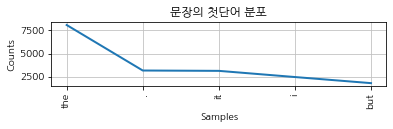

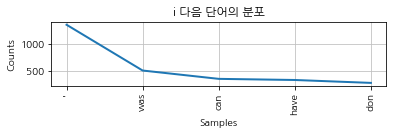

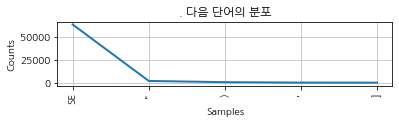

In [17]:
plt.subplot( 311 )
cfd["SS"].plot( 5, title = "문장의 첫단어 분포" )
plt.subplot( 312 )
cfd["i"].plot( 5, title = "i 다음 단어의 분포" )
plt.subplot( 313 )
cfd["."].plot( 5, title = ". 다음 단어의 분포" )

NLTK의 ConditionalProbDist 클래스에 MLEProbDist 클래스 팩토리를 인수로 넣어 위와 같이 빈도를 추정할 수 있다.

In [18]:
from nltk.probability import ConditionalProbDist, MLEProbDist

In [19]:
cpd = ConditionalProbDist( cfd, MLEProbDist )

트레이닝이 끝나면 조건부 확률의 값을 보거나 샘플 문장을 입력해서 문장의 로그 확률을 구할 수 있다.

In [20]:
cpd[ "i" ].prob( "am" )

0.018562267971650354

In [21]:
cpd[ "i" ].prob( "is" )

0.0002249971875351558

In [22]:
cpd[ "we" ].prob( "are" )

0.08504504504504505

In [23]:
cpd[ "we" ].prob( "is" )

0.0

## 바이그램 언어 모형

조건부 확률을 알게 되면 각 문장의 확률을 구할 수 있다.

다음으로 이 토큰열을 N-그램형태로 분해한다. 바이그램 모형에서는 전체 문장의 확률은 다음과 같이 조건부 확률의 곱으로 나타난다.

P(SS I am a boy SE)=P(I|SS)⋅P(am|I)⋅P(a|am)⋅P(boy|a)⋅P(.|boy)⋅P(SE|.)

#### 우선 다음과 같이 문장(단어 리스트)의 리스트를 만든다

In [24]:
   def sentence_score( s ):
    p = 0.0
    for i in range( len( s ) - 1 ):
        c = s[ i ]
        w = s[ i + 1 ]
        p += np.log( cpd[c].prob(w) + np.finfo( float ).eps )
    return np.exp( p )

In [25]:
test_sentence = [ "i", "like", "the", "movie", "." ]
sentence_score( test_sentence )

2.740764134071561e-06

In [26]:
test_sentence = [ "like", "i", "the", ".", "movie" ]
sentence_score( test_sentence )

1.5015040140827832e-38

#### 문장의 생성

이 모형을 기반으로 임의의 랜덤한 문장을 생성할 수 있다.

In [27]:
def generate_sentence( seed = None ):
    if seed is not None:
        import random
        random.seed( seed )
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[ c ].generate()

        if w == "SE":
            break
        elif w in [ "i", "ii", "iii" ]:
            w2 = w.upper()
        elif w in [ "mr", "luc", "i", "robin", "williams", "cindy", "crawford" ]:
            w2 = w.title()
        else:
            w2 = w

        if c == "SS":
            sentence.append( w2.title() )
        elif c in [ "`", "\"", "'", "(" ]:
            sentence.append( w2 )
        elif w in [ "'", ".", ",", ")", ":", ";", "?" ]:
            sentence.append( w2 )
        else:
            sentence.append( " " + w2 )

        c = w
    return "".join( sentence )

In [28]:
generate_sentence( 6 )

"Writers in one of the prison, yet, works as agent ray liotta, one of watching, we supposed to doubt that the holocaust - or the fact, the amc and don's wonderful experience, do what could either."

이번에는 한글 자료를 이용해보자 코퍼스로는 아래의 웹사이트에 공개된 Naver sentiment movie corpus 자료를 사용한다.

https://github.com/e9t/nsmc

In [37]:
%%time
!wget -nc -q https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

Wall time: 50.4 ms


'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [29]:
import codecs
with codecs.open( "ratings_train.txt", encoding = 'utf-8' ) as f:
    data = [ line.split( '\t' ) for line in f.read().splitlines() ]
    data = data[ 1: ]   # header 제외

docs = [ row[ 1 ] for row in data ]
len( docs )

150000

In [30]:
#import warnings
#warnings.simplefilter( "ignore" )

from konlpy.tag import Okt

tagger = Okt()

In [31]:
def tokenize( doc ):
    tokens = [ '/'.join( t ) for t in tagger.pos( doc ) ]
    return tokens

tokenize("그 영화는 아주 재미있었어요.")

['그/Noun', '영화/Noun', '는/Josa', '아주/Noun', '재미있었어요/Adjective', './Punctuation']

In [32]:
from tqdm import tqdm
sentences = []
for d in tqdm( docs ):
    tokens = tokenize( d )
    bigram = ngrams( tokens, 2, pad_left = True, pad_right = True, left_pad_symbol = "SS", right_pad_symbol = "SE" )
    sentences +=[ t for t in bigram ]

100%|█████████████████████████████████████████████████████████████████████████| 150000/150000 [04:31<00:00, 553.20it/s]


In [33]:
sentences[ :30 ]

[('SS', '아/Exclamation'),
 ('아/Exclamation', '더빙/Noun'),
 ('더빙/Noun', '../Punctuation'),
 ('../Punctuation', '진짜/Noun'),
 ('진짜/Noun', '짜증나네요/Adjective'),
 ('짜증나네요/Adjective', '목소리/Noun'),
 ('목소리/Noun', 'SE'),
 ('SS', '흠/Noun'),
 ('흠/Noun', '.../Punctuation'),
 ('.../Punctuation', '포스터/Noun'),
 ('포스터/Noun', '보고/Noun'),
 ('보고/Noun', '초딩/Noun'),
 ('초딩/Noun', '영화/Noun'),
 ('영화/Noun', '줄/Noun'),
 ('줄/Noun', '..../Punctuation'),
 ('..../Punctuation', '오버/Noun'),
 ('오버/Noun', '연기/Noun'),
 ('연기/Noun', '조차/Josa'),
 ('조차/Josa', '가볍지/Adjective'),
 ('가볍지/Adjective', '않구나/Verb'),
 ('않구나/Verb', 'SE'),
 ('SS', '너/Modifier'),
 ('너/Modifier', '무재/Noun'),
 ('무재/Noun', '밓었/Noun'),
 ('밓었/Noun', '다그/Noun'),
 ('다그/Noun', '래서/Noun'),
 ('래서/Noun', '보는것을/Verb'),
 ('보는것을/Verb', '추천/Noun'),
 ('추천/Noun', '한/Josa'),
 ('한/Josa', '다/Adverb')]

In [34]:
cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else:
        return cfd["/".join([c, pos])].most_common(n)

In [35]:
korean_most_common("나", 10)

[('는/Josa', 831),
 ('의/Josa', 339),
 ('만/Josa', 213),
 ('에게/Josa', 148),
 ('에겐/Josa', 84),
 ('랑/Josa', 81),
 ('한테/Josa', 50),
 ('참/Verb', 45),
 ('이/Determiner', 44),
 ('와도/Josa', 43)]

In [36]:
korean_most_common("의", 10)

[('영화/Noun', 19),
 ('연기/Noun', 14),
 ('구심/Noun', 12),
 ('모습/Noun', 9),
 ('감독/Noun', 8),
 ('매력/Noun', 7),
 ('감동/Noun', 7),
 ('흐름/Noun', 6),
 ('그/Noun', 6),
 ('이야기/Noun', 6)]

In [37]:
korean_most_common(".", 10, "Punctuation")

[('SE', 26503),
 ('영화/Noun', 667),
 ('이/Noun', 565),
 ('정말/Noun', 480),
 ('그리고/Conjunction', 455),
 ('./Punctuation', 445),
 ('하지만/Conjunction', 369),
 ('이/Determiner', 352),
 ('그/Noun', 325),
 ('스토리/Noun', 317)]

In [38]:
def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

In [39]:
korean_bigram_prob("이", "영화")

0.4010748656417948

In [40]:
korean_bigram_prob("영화", "이")

0.00015767585785521414

In [41]:
def korean_generate_sentence(seed=None, debug=False):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
            
        w = cpd[c].generate()

        if w == "SE":
            break

        w2 = w.split("/")[0]
        pos = w.split("/")[1]

        if c == "SS":
            sentence.append(w2.title())
        elif c in ["`", "\"", "'", "("]:
            sentence.append(w2)
        elif w2 in ["'", ".", ",", ")", ":", ";", "?"]:
            sentence.append(w2)
        elif pos in ["Josa", "Punctuation", "Suffix"]:
            sentence.append(w2)
        elif w in ["임/Noun", "것/Noun", "는걸/Noun", "릴때/Noun",
                   "되다/Verb", "이다/Verb", "하다/Verb", "이다/Adjective"]:
            sentence.append(w2)
        else:
            sentence.append(" " + w2)
        c = w

        if debug:
            print(w)

    return "".join(sentence)

In [42]:
korean_generate_sentence(0)

'미키짱과 말도 전혀 빗나가지 않던 전개로 꽥꽥대는거 보니까 요^^'

In [43]:
korean_generate_sentence(1)

'내용 일테인데 이 영화 최고의 암살 할려고 한 데 선배랑 김선아 연기도 크다. 배슬기 여배우도 있는 척 하는거지?'

In [44]:
korean_generate_sentence(2)

'도리까지 본 영화 너무... 뭔가.. 최고네요. 하지만.. 눈물 낫다는건 또 영화에 들지 않는다. 근데 뭐야 어떻게 그렇게 착했던 윤재랑은 에바 그린 드레스 소리 듣는거임""" 에리 욧의 미모로 합성 한 가수 노래와 흥행 놓친 영화다. 사투리 연기 하나 없는 ‘ 스피드 감 넘치는 스릴 넘치는 연기를 이해 되지 못 하시는 분보다 훨 재밌구만 평점을 망처 놓은 듯하다. 영화 보는이로 하여금 불편함을 느꼇을듯'

In [45]:
korean_generate_sentence(3)

'내 인생을 반헬싱이 너무 무섭고 재밌고, 칼 세이건으로 연탄가스 맡아서 죽을 같이 작업 하는구나 ㅋㅋㅋㅋㅋ 진짜'

In [46]:
korean_generate_sentence(5)

'좋았어요... ㅎㄷㄷㄷ 시나리오나 그래픽이 대단한 심리전이 미라 파스틱 함.. 너무 무섭고 나쁜세 끼는 듯 진짜 꼭 필요가 있는지도 모르겠지만 나름 그의 복수 후!!!!!!!!!!!'